# XGBoost

- **O XGBoost só funciona com vetores numéricos**. Sim! você precisa trabalhar em tipos de dados aqui. 
- Fonte [How to use XGBoost algorithm in R in easy steps](https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/)
- Fonte [https://rpubs.com/dalekube/XGBoost-Iris-Classification-Example-in-R](https://rpubs.com/dalekube/XGBoost-Iris-Classification-Example-in-R)

## Carregando Biblioteca

In [1]:
library(repr)
library(caTools)
options(repr.plot.width = 8, repr.plot.height = 8)
#Boost
install.packages('xgboost')
library(xgboost)
#Preprocessamento
library(CatEncoders)
library(gplots)
#Matricas
library(caret)

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Adria\AppData\Local\Temp\Rtmp48Yn9C\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'CatEncoders'

The following object is masked from 'package:base':

    transform


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Carregando os dados

In [2]:
df <- read.csv("../datasets/titanic/train.csv", na.strings = '')
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Pré-Processamento de Dados

In [3]:
# Extração de Pronomes
df$Name <- ifelse(grepl(", Mr. ", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Capt", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Don", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Major", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Col", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Dr", df$Name), 'Dr', as.character(df$Name))
df$Name <- ifelse(grepl("Rev", df$Name), 'Rev', as.character(df$Name))
df$Name <- ifelse(grepl("Sir", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Jonkheer", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Dona", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Countess", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mme", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Lady", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mrs", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mlle", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Ms", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Miss", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Master", df$Name), 'Master', as.character(df$Name))

# Categóricas para Numéricas
le_name <- LabelEncoder.fit(unique(df$Name))
df$Name <- transform(le_name, df$Name)

# Substituir valores ausentes/nulos
media <- mean(df$Age, na.rm = TRUE)
df$Age <- ifelse(is.na(df$Age), media, df$Age)

t <- table(df$Embarked)
moda <- names(t[t == max(t)])

df$Embarked <- ifelse(is.na(df$Embarked), as.character(moda), as.character(df$Embarked) )

# Categórico Para numérico
le_sex <- LabelEncoder.fit(unique(df$Sex))
df$Sex <- transform(le_sex, df$Sex)

le_embarked <- LabelEncoder.fit(unique(df$Embarked))
df$Embarked <- transform(le_embarked, df$Embarked)

# Remoção de colunas
df$PassengerId <- NULL
df$Ticket <- NULL
df$Cabin <- NULL

#Escalonamento 
df[, c('Age', 'Fare')] <- scale(df[, c('Age', 'Fare')])

df$Name = factor(df$Name)
df$Pclass = factor(df$Pclass)
df$Sex = factor(df$Sex)
df$Embarked = factor(df$Embarked)

head(df)
str(df)

Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,4,2,-0.5921480,1,0,-0.5021631,3
1,1,5,1,0.6384304,1,0,0.7864036,1
1,3,3,1,-0.2845034,0,0,-0.4885799,3
1,1,5,1,0.4076970,1,0,0.4204941,3
0,3,4,2,0.4076970,0,0,-0.4860644,3
0,3,4,2,0.0000000,0,0,-0.4778481,2


'data.frame':	891 obs. of  9 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : Factor w/ 7 levels "1","2","3","4",..: 4 5 3 5 4 4 4 2 5 5 ...
 $ Sex     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  -0.592 0.638 -0.285 0.408 0.408 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  -0.502 0.786 -0.489 0.42 -0.486 ...
 $ Embarked: Factor w/ 3 levels "1","2","3": 3 1 3 3 3 2 3 3 3 1 ...


# Divisão dos dados em treino e teste

In [4]:
set.seed(0)
divisao <- sample.split(df$Survived, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

x_train <- treino[,-1]
y_train <- treino$Survived

x_test <- teste[,-1]
y_test <- teste$Survived

## XGBoost

Argumentos

- **silent**: O valor padrão é 0. Você precisa especificar 0 para imprimir mensagens em execução, 1 para o modo silencioso.
     booster: o valor padrão é gbtree. Você precisa especificar o booster a ser usado: gbtree (baseado em árvore) ou g-blinear (função linear).
- **num_pbuffer**: Isso é definido automaticamente pelo xgboost, não há necessidade de ser definido pelo usuário. Leia a documentação do xgboost para mais detalhes.
- **num_feature**: Isso é definido automaticamente pelo xgboost, não há necessidade de ser definido pelo usuário.
- **eta** - O valor padrão é definido como 0,3. Você precisa especificar a redução do tamanho do passo usado na atualização para evitar ajustes excessivos. Após cada etapa de aumento, podemos obter diretamente os pesos dos novos recursos. e eta realmente reduz os pesos dos recursos para tornar o processo de boosting mais conservador. O intervalo é de 0 a 1. Um valor eta baixo significa que o modelo é mais robusto para overfitting.
- **gama** - O valor padrão é definido como 0. Você precisa especificar a redução de perda mínima necessária para fazer uma partição adicional em um nó folha da árvore. Quanto maior, mais conservador será o algoritmo. O intervalo é de 0 a ∞. Quanto maior a gama, mais conservador é o algoritmo.
- **max_depth**: O valor padrão é definido como 6. Você precisa especificar a profundidade máxima de uma árvore. O intervalo é de 1 a ∞.
- **min_child_weight** - O valor padrão é definido como 1. Você precisa especificar a soma mínima do peso da instância (hessian) necessária em um filho. Se a etapa de partição em árvore resultar em um nó folha com a soma do peso da instância menor que min_child_weight, o processo de construção desistirá de particionamento posterior. No modo de regressão linear, isso simplesmente corresponde ao número mínimo de instâncias necessárias para estar em cada nó. Quanto maior, mais conservador será o algoritmo. O intervalo é de 0 a ∞.
 - **max_delta_step** - O valor padrão é definido como 0. Etapa delta máxima que permitimos que a estimativa de peso de cada árvore seja. Se o valor for definido como 0, significa que não há restrição. Se for definido com um valor positivo, pode ajudar a tornar a etapa de atualização mais conservadora. Normalmente este parâmetro não é necessário, mas pode ajudar na regressão logística quando a classe está extremamente desequilibrada. Defina-o para um valor de 1-10 pode ajudar a controlar a atualização. O intervalo é de 0 a ∞.
- **subsample** - o valor padrão é definido como 1. Você precisa especificar a proporção da subamostra da instância de treinamento. Configurá-lo como 0,5 significa que o XGBoost coletou aleatoriamente metade das instâncias de dados para cultivar árvores e isso evitará o sobreajuste. O intervalo é de 0 a 1.
- **colsample_bytree** - O valor padrão é definido como 1. Você precisa especificar a proporção da subamostra das colunas ao construir cada árvore. O intervalo é de 0 a 1.
- **lambda e alpha** - são os termos de regularização dos pesos. O valor padrão do lambda assumido é 1 e alfa é 0.
- **lambda_bias** - Termo de regularização L2 em polarização e tem um valor padrão de 0. 
- **base_score**: O valor padrão é definido como 0,5. Você precisa especificar a pontuação de predição inicial de todas as instâncias, tendência global.
- **objective**: o valor padrão é definido como reg: linear. Você precisa especificar o tipo de aluno que deseja, o que inclui regressão linear, regressão logística, regressão de Poisson etc.
- **eval_metric**: Você precisa especificar as métricas de avaliação para dados de validação, uma métrica padrão será atribuída de acordo com o objetivo (rmse para regressão e erro para classificação, precisão média média para classificação
- **seed**: Como sempre aqui, você especifica a semente para reproduzir o mesmo conjunto de saídas. 
- **nrounds** - Devine quantas passagens nos dados haverá nos dados, caso n = 2, a segunda irá aprimorar o modelo reduzindo ainda mais a diferença entre a verdade e a previsão. 
- **nthread** - o número de threads de CPU que vamos usar;


In [5]:
set.seed(0)
classificador <- xgboost(data = data.matrix(x_train), label = y_train, nrounds = 10, objective = "multi:softprob", num_class = 2,  eval_metric="mlogloss",)

[1]	train-mlogloss:0.539341 
[2]	train-mlogloss:0.454312 
[3]	train-mlogloss:0.395439 
[4]	train-mlogloss:0.355627 
[5]	train-mlogloss:0.326271 
[6]	train-mlogloss:0.302407 
[7]	train-mlogloss:0.286392 
[8]	train-mlogloss:0.273107 
[9]	train-mlogloss:0.257876 
[10]	train-mlogloss:0.244294 


## Exibir o Gráfico de Decisção

- **plot**
- **text**
- **rpart.plot**
- **summary**

In [6]:
classificador

##### xgb.Booster
raw: 88.6 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, objective = "multi:softprob", num_class = 2, 
    eval_metric = "mlogloss")
params (as set within xgb.train):
  objective = "multi:softprob", num_class = "2", eval_metric = "mlogloss", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 8 
niter: 10
nfeatures : 8 
evaluation_log:
    iter train_mlogloss
       1       0.539341
       2       0.454312
---                    
       9       0.257876
      10       0.244294

In [7]:
summary(classificador)

               Length Class              Mode       
handle             1  xgb.Booster.handle externalptr
raw            90699  -none-             raw        
niter              1  -none-             numeric    
evaluation_log     2  data.table         list       
call              16  -none-             call       
params             4  -none-             list       
callbacks          2  -none-             list       
feature_names      8  -none-             character  
nfeatures          1  -none-             numeric    

## Prever os dados de Teste

- Irá retornar uma matrix contendo a probabilidade de pertencer a cada uma das classes

In [8]:
previsao = predict(classificador, newdata = data.matrix(x_test), reshape=T)
colnames(previsao) = c('morto', 'vivo')
head(previsao)

classe = ifelse((previsao[, 1] > 0.5), 0, 1)
previsao <- classe

'acuracia'
acuracia = 100 * sum(previsao == y_test)/length(y_test)
acuracia

morto,vivo
0.9490601,0.05093995
0.0280771,0.97192287
0.7311389,0.26886106
0.1371471,0.86285287
0.4452842,0.55471575
0.8958550,0.10414502


[1] "acuracia"

[1] 80.26906

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [9]:
matriz_confusao = table(y_test, previsao)
matriz_confusao

      previsao
y_test   0   1
     0 119  18
     1  26  60

In [10]:
matriz = confusionMatrix(factor(previsao), factor(y_test))
matriz

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 119  26
         1  18  60
                                          
               Accuracy : 0.8027          
                 95% CI : (0.7443, 0.8528)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 1.132e-09       
                                          
                  Kappa : 0.5763          
                                          
 Mcnemar's Test P-Value : 0.2913          
                                          
            Sensitivity : 0.8686          
            Specificity : 0.6977          
         Pos Pred Value : 0.8207          
         Neg Pred Value : 0.7692          
             Prevalence : 0.6143          
         Detection Rate : 0.5336          
   Detection Prevalence : 0.6502          
      Balanced Accuracy : 0.7831          
                                          
       'Positive' Class : 0               
                              

## Personalizando a Matriz de Confusão

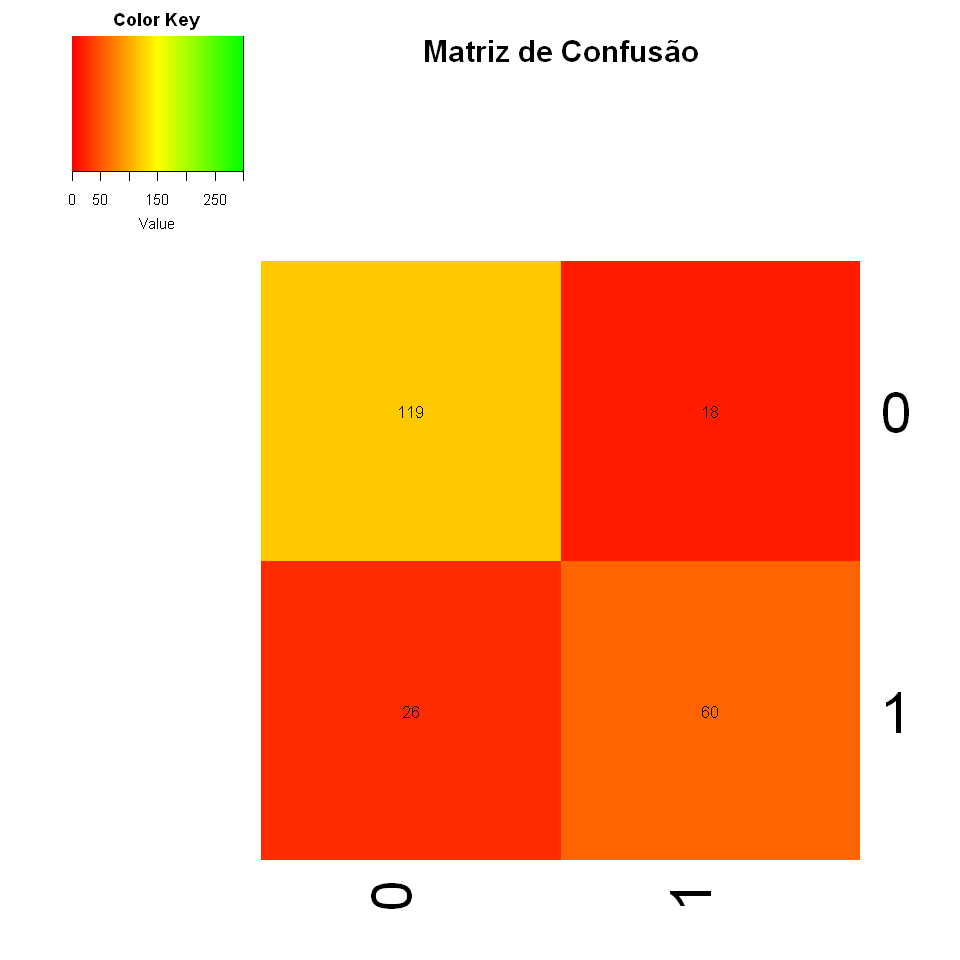

In [11]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

# Métricas

- **Precisão** que é a fração de instâncias recuperadas que são relevantes, 
- **Recall** - que é a fração de instâncias relevantes que são recuperadas 
- **f-score** - é 2 * precisão * recall / (precisão + recall) é 

In [12]:
precision(factor(previsao), factor(y_test))
'Morto'
precision(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
precision(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8206897

[1] "Morto"

[1] 0.7692308

[1] "Vivo"

[1] 0.8206897

In [13]:
recall(factor(previsao), factor(y_test))
'Morto'
recall(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
recall(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8686131

[1] "Morto"

[1] 0.6976744

[1] "Vivo"

[1] 0.8686131

In [14]:
F_meas(factor(previsao), factor(y_test))
'Morto'
F_meas(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
F_meas(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8439716

[1] "Morto"

[1] 0.7317073

[1] "Vivo"

[1] 0.8439716

# Ajustar Parâmetros

In [15]:
set.seed(0)
classificador <- xgboost(data = data.matrix(x_train), 
                         eta = 0.1,
                         max_depth = 15, 
                         nround=25, 
                         subsample = 0.5,
                         colsample_bytree = 0.5,
                         eval_metric = "merror",
                         nthread = 3,                    
                         label = y_train,
                         objective = "multi:softprob",
                         num_class = 2,
                        )

previsao = predict(classificador, newdata = data.matrix(x_test), reshape=T)
classe = ifelse((previsao[, 1] > 0.5), 0, 1)
previsao <- classe
'acuracia'
acuracia = 100 * sum(previsao == y_test)/length(y_test)
acuracia

[1]	train-merror:0.131737 
[2]	train-merror:0.124251 
[3]	train-merror:0.127246 
[4]	train-merror:0.119760 
[5]	train-merror:0.113772 
[6]	train-merror:0.112275 
[7]	train-merror:0.115269 
[8]	train-merror:0.115269 
[9]	train-merror:0.112275 
[10]	train-merror:0.112275 
[11]	train-merror:0.109281 
[12]	train-merror:0.104790 
[13]	train-merror:0.103293 
[14]	train-merror:0.097305 
[15]	train-merror:0.095808 
[16]	train-merror:0.089820 
[17]	train-merror:0.088323 
[18]	train-merror:0.089820 
[19]	train-merror:0.089820 
[20]	train-merror:0.092814 
[21]	train-merror:0.095808 
[22]	train-merror:0.086826 
[23]	train-merror:0.083832 
[24]	train-merror:0.086826 
[25]	train-merror:0.086826 


[1] "acuracia"

[1] 82.95964

# Validação Cruzada

- **method = cv** - indica que iremos usar o método crossvalidation
- **number = 10** - define o número de fold
- **method = xgbTree** - indica que iremos usar o algorítmo de de Boost

In [16]:
controle_treinamento = trainControl(method = 'cv', number = 10)
df$Survived = factor(df$Survived)
modelo = train(Survived ~ ., data = df, trControl = controle_treinamento, method = 'xgbTree', verbose = FALSE )
modelo$results

,eta,max_depth,gamma,colsample_bytree,min_child_weight,subsample,nrounds,Accuracy,Kappa,AccuracySD,KappaSD
1,0.3,1,0,0.6,1,0.50,50,0.8125968,0.5991972,0.04122726,0.08800752
4,0.3,1,0,0.6,1,0.75,50,0.8137328,0.6033150,0.04631694,0.09784588
7,0.3,1,0,0.6,1,1.00,50,0.8092260,0.5923297,0.04695794,0.09987783
10,0.3,1,0,0.8,1,0.50,50,0.8137328,0.6024889,0.04570721,0.09643140
13,0.3,1,0,0.8,1,0.75,50,0.8103496,0.5944208,0.03783577,0.08057837
16,0.3,1,0,0.8,1,1.00,50,0.8137203,0.6024167,0.04358540,0.09209431
55,0.4,1,0,0.6,1,0.50,50,0.8204619,0.6163252,0.03759774,0.08123917
58,0.4,1,0,0.6,1,0.75,50,0.8170911,0.6087990,0.04119852,0.08801159
61,0.4,1,0,0.6,1,1.00,50,0.8092260,0.5923270,0.04019822,0.08522559
64,0.4,1,0,0.8,1,0.50,50,0.8069788,0.5872609,0.04083601,0.08554035
